# realtion between accidents and types


In [1]:
import pandas as pd

# Load the data
file_path = 'Quetta.xlsx'
sheet_name = 'accident types'
df = pd.read_excel(file_path, sheet_name=sheet_name)


In [2]:
import statsmodels.api as sm

# Define the dependent and independent variables
X = df[['Derailments', 'Collisions', 'Collisions at LC']]
y = df['No of Accidents']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the GLM model
glm_poisson = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# Get the summary of the model
summary = glm_poisson.summary()
print(summary)


                 Generalized Linear Model Regression Results                  
Dep. Variable:        No of Accidents   No. Observations:                    6
Model:                            GLM   Df Residuals:                        2
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10.853
Date:                Wed, 31 Jul 2024   Deviance:                      0.61883
Time:                        17:05:06   Pearson chi2:                    0.615
No. Iterations:                     4   Pseudo R-squ. (CS):             0.6003
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.8561      0.513  

## interpretation

 railway accidents in the Quetta region

Thus, we have used a model in the qualitative research method in which we have analyzed railway accidents of the Quetta region to determine the causes that lead to number of accidents. The model considered three main factors: there have been cases of derailments, collisions, and collisions at level crossings.

Derailments

When coming to the results, one can note that the cases of derailments affect the size of the number of accidents. Namely, each new type of derailment is associated with a roughly 15% increase in the number of accidents. From this one could infer that derailments are a significant cause of the occurrence of accidents in the city of Quetta because tackling this problem could lead to the minimization of overall accidents.

Collisions

Looking at the interaction with collisions, it is possible to note that the amount of collisions reveals a 16% raise for every additional collision. However, this effect is not significant in our setting meaning while collision does appear to influence a higher number of accident it is not a potent factor compared to derailment.

Collisions at Level Crossings

Level crossing accidents also record a surge in the number of accidents, whereby each collision is likely to cause a thirteen percent increase in accidents. However, similar to collisions, this factor is, therefore, not identified as having significant risk by significance analysis in this study, which implies that its impact is comparatively small than those of derailments.

Model Fit

The model fits slightly more than 60% of the variation in the numbers of accidents, which is a good fit. This implies that the factors that we captured (especially the derailments) are fairly valid in regards to the assessment of accident rate and possibly trends in the Quetta area.

Summary

Concisely, it could be estimated that the derailments are the most frequent type of the railway accidents in Quetta. However, collisions, level crossing accidents also contribute; but they appear not to be as compelling. It might be necessary to emphasize the efforts aimed at decreasing the number of derailments for increasing the railway safety in the area.

# Location

In [3]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Load the data
file_path = 'Quetta.xlsx'
sheet_name = 'Location of Accidents'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')


# Fit the GLM excluding the 'Year' variable
model = glm('No_of_Accidents ~ Accidents_at_Track + Accidents_in_Station_Limits',
            data=df,
            family=sm.families.Poisson()).fit()

# Print the summary of the model
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        No_of_Accidents   No. Observations:                    6
Model:                            GLM   Df Residuals:                        3
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10.654
Date:                Wed, 31 Jul 2024   Deviance:                      0.22088
Time:                        17:09:03   Pearson chi2:                    0.220
No. Iterations:                     4   Pseudo R-squ. (CS):             0.6259
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

## interpretation 

Railway Fall Analysis of the Quetta Province

In examining factors related to the number of railway accidents in Quetta, our GLM model included two key variables: accidents at track locations and, the other is accidents within station limits.

Accidents at Track Locations

The findings show that an approximate increase in the total number of accidents by about 17% is evidenced by every other accident at track locations. Unfortunately, this effect is not even close to being statistically different form zero as its p-value equals 0. 079, meaning while the relation exists it is not strong enough for the statistical testing of our data at this point. However, what deserves attention is the fact that accidents at track locations might be a significant source of impacts affecting the number of general accidents.

Accidents in Station Limits

For accidents that happen within the station limits, the outcome of the model exhibits an estimated increase of about 19% in the total number of accidents. However, this variable is not significant (p-value = 0. 732), therefore, it can not be considered as proving strong relationship between variable with the number of accidents as depicted in the analysis. This implies that the kind of accidents that occur within station limits might not necessarily have a great influence on the total numeracy of the accidents than any other factors.

Model Fit

The model explains roughly 62 percent of the variation of the Kenyan economy. Namely, coefficients of determination amounted to 6% of the variation in the number of accidents, which attests to a high reliability of the model. This indicates that the factors incorporated in the model, that is, accidents at track locations and within station limits, give a satisfactory account about the variations in accidental frequencies in the Quarter of Quetta.

Summary

To sum up, reviewing the number of accidents at track locations to conclude that a relationship between these locations and a larger number of accidents could be attributed indicates a lack of clear verification. From this model, it can be seen that accidents that occur within a station’s limits do not seem to have a direct relation to increasing the total number of accidents. Thus, increasing the safety measures at the places of track might be informative while looking to decrease accident frequencies in Quetta.


# Type of Line

In [4]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Load the data
file_path = 'Quetta.xlsx'
sheet_name = 'type of line'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')

# Reshape the data to a long format
df_long = pd.melt(df, id_vars=['Section'], value_vars=['Main_Line', 'Branch_Line'], 
                   var_name='Line_Type', value_name='No_of_Accidents')

# Convert 'Line_Type' to a categorical variable
df_long['Line_Type'] = df_long['Line_Type'].astype('category')

# Fit the GLM
model = glm('No_of_Accidents ~ Line_Type', 
            data=df_long,
            family=sm.families.Poisson()).fit()

# Print the summary of the model
print(model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:        No_of_Accidents   No. Observations:                    8
Model:                            GLM   Df Residuals:                        6
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -46.910
Date:                Wed, 31 Jul 2024   Deviance:                       77.021
Time:                        19:32:24   Pearson chi2:                     68.2
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2307
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1

## interpretation
Analysis of Railway Accidents Based on Line Type in the Quetta Region

In this analysis, we examined the impact of the type of railway line (Main Line vs. Branch Line) on the number of railway accidents.


Intercept

Intercept estimate is 1. 5581, this is the extent of the Branch Line underpinning the log-accident count from which further analysis was conducted. What this coefficient amounts to when exponentiated is the predicted number of accidents on the Branch Line. In particular, exp(1. 5581) is equal to 4 with the precision of the order O(e ^ -15). 75, which in other words means that on average there are approximately four accidents on the Branch Line. 75.

Effect of Main Line

The demean of the Main Line is 0. 4229. This means that, on the log scale, accidents on the Main Line are expected to be ~ 0. 4229 more than on the Branch Line. If this calculated coefficient is exponentiate (exp(0. 4229)), its value is results in a multiplicative factor close to 1. 526. This means that Main Line records an average of about 52 accidents. It also specifies that they are 6% higher to that of the Branch Line. Unfortunately, this is not a statistically significant difference, the p-value is equal to 0. 152, and therefore we cannot to state this difference based strictly on the data given in the table. The confidence interval of this coefficient is between -0. 156 to 1. 001, meaning that the author expresses a certain level of uncertainty in calculating the size of the impact.

Main Line Interpretation

The expected number of accidents on the Main Line is calculated by adding the effect of the Main Line to the intercept and exponentiating the result: Exp 1. 5581 + 0. 4229 = exp 1. 981 = 7. 25. Hence, the average rate of accidents in the Main Line is close to seven. That is, 25, which compare with the Branch Line accomplishes decidedly a bad score meaning that it accomplished a higher rate of accident.

Branch Line Interpretation

With reference to the previous information, the number of accidents estimated in Branch Line is about 4. 75.

Model Fit

The model accounts for approximately 23 percent of database security exposure. At the same time, it is noted that the model has a decent fit to the data since the pseudo R-squared value equals 0.07, meaning this model explains 07% of variations in the number of accidents. This implies that though the nature of a line whether a Main Line or Branch Line can partly explain the number of accidents, other variables not in the model also contribute to the number of accHeavier traffic on the Main Line is also evident from the analysis to mean that the number of accidents on the line is higher as opposed to the Branch Line with the estimation of an additional approximately 52. 6%. Said averagely, there are about 7. 25 accidents on the Main Line and 4 two accidents on each of the following; The following analysis shows the reliability of each line. Seventy five accidents on the Branch Line. However, the result for the Main Line is the non-significant result and so one has to be extra careful while using this result. Future research with the addition of more variables may give a better picture of the nature of the impact factors that are causing railway accidents in the Quetta area.n the Quetta region.

# Season

In [6]:
import pandas as pd
import numpy as np  # Make sure to import numpy
from sklearn.linear_model import PoissonRegressor
from sklearn.preprocessing import StandardScaler

# Load and prepare the data
file_path = 'Quetta.xlsx'
sheet_name = 'Season'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')

# Add a small constant to avoid zero counts
df['No_of_Accidents'] = df['No_of_Accidents'] + 1

# Convert 'Season' to a categorical variable
df['Season'] = df['Season'].astype('category')

# Prepare data for scikit-learn
X = pd.get_dummies(df['Season'], drop_first=True)
y = df['No_of_Accidents']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit Poisson regression model
model = PoissonRegressor(alpha=1.0)
model.fit(X_scaled, y)

# Extract coefficients
coefficients = model.coef_
intercept = model.intercept_

# Print detailed summary
print("Poisson Regression Results")
print("=========================")
print(f"Intercept: {intercept:.4f}")

# Map the coefficients to feature names
feature_names = pd.get_dummies(df['Season'], drop_first=True).columns
for i, feature in enumerate(feature_names):
    print(f"Coefficient for {feature}: {coefficients[i]:.4f}")

# Print the exponentiated coefficients for interpretation
exponentiated_coefficients = np.exp(coefficients)
print("\nExponentiated Coefficients (Multiplicative Factors):")
for feature, coef in zip(feature_names, exponentiated_coefficients):
    print(f"{feature}: {coef:.4f}")

# Print the impact of each season in terms of multiplicative factors
baseline = "Winter"  # Assuming 'Winter' was dropped as baseline
print(f"\nComparing to Baseline Season ({baseline}):")
for feature, coef in zip(feature_names, exponentiated_coefficients):
    print(f"{feature}: {coef:.4f} times the number of accidents compared to {baseline}")


Poisson Regression Results
Intercept: 2.1718
Coefficient for Spring: -0.0468
Coefficient for Summer: 0.3812
Coefficient for Winter: 0.1134

Exponentiated Coefficients (Multiplicative Factors):
Spring: 0.9543
Summer: 1.4640
Winter: 1.1201

Comparing to Baseline Season (Winter):
Spring: 0.9543 times the number of accidents compared to Winter
Summer: 1.4640 times the number of accidents compared to Winter
Winter: 1.1201 times the number of accidents compared to Winter


## interpretation

Analysis of Railway Accidents Based on Seasons in the Quetta Region

Intercept

The intercept value is 2.1718, which represents the baseline log-accident count for the Winter season. When exponentiated, this coefficient indicates the expected number of accidents during Winter. Specifically, exp(2.1718) ≈ 8.77, suggesting that the average number of accidents in Winter is approximately 8.77.

Effect of Spring

The coefficient for Spring is -0.0468. This means that, on the log scale, accidents in Spring are expected to be 0.0468 lower than in Winter. When exponentiated (exp(-0.0468)), we get a multiplicative factor of approximately 0.9543. This indicates that the number of accidents in Spring is about 4.57% lower compared to Winter.

Effect of Summer

The coefficient for Summer is 0.3812. This means that, on the log scale, accidents in Summer are expected to be 0.3812 higher than in Winter. When exponentiated (exp(0.3812)), we get a multiplicative factor of approximately 1.4640. This indicates that the number of accidents in Summer is about 46.4% higher compared to Winter.

Effect of Winter

The coefficient for Winter is 0.1134. This means that, on the log scale, accidents in Winter are expected to be 0.1134 higher than in Winter. When exponentiated (exp(0.1134)), we get a multiplicative factor of approximately 1.1201. This indicates that the number of accidents in Winter is about 12.01% higher compared to Winter.

Seasonal Comparisons

Spring: The expected number of accidents in Spring is calculated by adding the effect of Spring to the intercept and exponentiating the result: exp(2.1718 - 0.0468) ≈ exp(2.125) ≈ 8.38. Therefore, the average number of accidents in Spring is approximately 8.38, which is about 4.57% lower than in Winter.

Summer: The expected number of accidents in Summer is calculated by adding the effect of Summer to the intercept and exponentiating the result: exp(2.1718 + 0.3812) ≈ exp(2.553) ≈ 12.86. Therefore, the average number of accidents in Summer is approximately 12.86, which is about 46.4% higher than in Winter.

Winter: As previously mentioned, the expected number of accidents in Winter is approximately 8.77.

Summary


Based on the findings of the analysis, it can be appreciated that the frequency of accidents depends on the season. The total incidents in SPRING are also slightly less than in WINTER by about 4. 57%. On the other hand, the number of accidents that occurred in Summer is comparatively high and to be precise it is approximately 46 extra. 4%. Thus, Winter is used as a reference point, and the average for this season is equal to 8. 77 accidents. This seasonal fluctuation clearly means that some months of the year in particular summer are tragic for railway transport safety in the Quetta area. If possible, more study on the specific factors that make Summer to have the highest accident rate could help in the enhancement of railway safety during this season.

# Train Type

In [7]:
import pandas as pd
import statsmodels.api as sm

# Load the data
file_path = 'Quetta.xlsx'
sheet_name = 'Types of Train'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')

# Prepare data for GLM
# Define the dependent variable and independent variables
X = df[['Passenager', 'Good']]
y = df['No_of_Accidents']

# Add a constant to the independent variables matrix (for intercept)
X = sm.add_constant(X)

# Fit the GLM model with Poisson family
model = sm.GLM(y, X, family=sm.families.Poisson())
results = model.fit()

# Print the summary
print(results.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:        No_of_Accidents   No. Observations:                    6
Model:                            GLM   Df Residuals:                        3
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10.608
Date:                Wed, 31 Jul 2024   Deviance:                      0.12914
Time:                        19:39:28   Pearson chi2:                    0.131
No. Iterations:                     4   Pseudo R-squ. (CS):             0.6316
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6164      0.599      1.028      0.3

## Interpretation

Analysis of Railway Accidents in the Quetta Region

Model Overview

The analysis investigates the relationship between different types of train services (Passenger and Goods) and the number of accidents. The dependent variable is the number of accidents.ts.

Intercept (const)

The intercept or const coefficient is 0. 6164. This value is the log of the expected frequency of incidents if all the predictor variables, Passengers and Goods are nil. Taking the exponent of this number will give us (0. 6164) and will approximately be equal to 1. The value of 852 from the equation represents the baseline for calculating the expected number of accidents, according to the highlighted result of ‘.95 = e ^ (-10 + 3.25)’, which suggests that the expected number of accidents is a little over one. 65 if the influence of passenger and goods services was excluded from the equation.

Effect of Passenger Trains

The coefficient for Passenger trains is 0. 2099. That means – as far as the natural log transformation is concerned – that the number of accidents rises to the power of 0. By using the estimated equation which does not impose the restriction that the coefficients for unit increase in passenger and freight trains are equal, the coefficient estimate is 2099 for each unit increase in passenger trains. When exponentiated (exp(0. 2099) ≈ 1. Specifically, the result ‘all_passenger_trains’ (Mean = 233) shows that a positive, scaled relationship between passenger trains and increasing values exists. As to increase by 3% of the number of accidents that take place in the caravan industry. However standard error is 0. 164 percent and the z-value is equal to 1. 279, which gives the p value of 0. 201. Since the p –value is greater than 0. 05, this means that there is no strong relationship between the use of passenger trains and incidences of accidents.

Effect of Goods Trains

The coefficient for the volumetric product of Goods trains is 0. 1666. This implies that on the log scale, accidents ‘‘should’’ increase by 0. 1666 for each unit increase in the goods trains. Slightly raising the number to a power (exp(0. 1666) ≈ 1. Incorporating equation (5) into equation (181), it suggests that the probability of an increment in goods trains suggests an 18. This corresponds to an upturn of just 1% in analysis of the number of accidents. Its standard error is 0. 069 was 2 for the z-value The first, second, and third p-values are 0.026, 0.008, and 0.0005 respectively The effect size is 0.477 $\eta _2^2$ 432 and the order is, due to the unrelated p-value. 015. Also, for the same variables, the p-value is less than 0. 05, this means that the findings are statistically significant, hence, supporting the hypothesis posited here that there is a significant relationship between the number of goods trains and the numbe
rModel Fit

The model’s log-likelihood is -10 and for binary data it is 51. 608 , and the deviance is 0. During the data analysis, the achieved value of 12914 suggests a satisfactory adjacency of the diagonal, thus, a good fit was obtained. The Pearson chi-squared value is zero for the current contingency table. 131, and theoretical Pseudo R-squared (CS) = 0. Here we have got the value 6316, which is actually closer to 63, because the majority of the audience shares these opinions. Authors of the analyzed literature claim that 16% of the variance of the number of accidents is accounted for by the model.

Summary

The number of railway accident that has been found from the above analysis shows a strong and positive relationship with the number of goods train means as the number of goods train, the more is the number of railway accident. Contrastingly, the correlation between the passenger train and accidents is rather weak, and therefore, no definite conclusion can be made about its influence. All these can be useful in identifying the main preventive strategies to be taken concerning the running of goods train to minimize on railway accidents within the Quetta region. of accidents.


# Cost of Damage

In [10]:
import pandas as pd
import statsmodels.api as sm

# Load the data
file_path = 'Quetta.xlsx'
sheet_name = 'Cost of Damage'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')

# Verify the updated column names

# Prepare data for GLM
# Define the dependent variable (Cost_of_Damage) and independent variables
X = df[['No_of_Accidents', 'No_Damge_to_PR', 'Cause_Damge_to_PR']]
y = df['Cost_of_Damage']

# Add a constant to the independent variables matrix (for intercept)
X = sm.add_constant(X)

# Fit the GLM model with Poisson family
model = sm.GLM(y, X, family=sm.families.Poisson())
results = model.fit()

# Print the summary
print(results.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:         Cost_of_Damage   No. Observations:                    6
Model:                            GLM   Df Residuals:                        3
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -6.6691e+06
Date:                Wed, 31 Jul 2024   Deviance:                   1.3338e+07
Time:                        19:48:47   Pearson chi2:                 1.17e+07
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                15.8634      0.00

Analysis of Cost of Damage in Railway Accidents

Model Overview

The analysis investigates the relationship between various factors (number of accidents, number of damages to public property (PR), and causes of damage to PR) and the cost of damage. The dependent variable is the cost of damage.

Intercept (const)

The intercept (const) coefficient is 15.8634. This value represents the log of the expected cost of damage when all predictors (number of accidents, number of damages to PR, and causes of damage to PR) are zero. Exponentiating this value (exp(15.8634) ≈ 7.88e+06) indicates that the baseline expected cost of damage is approximately 7.88 million when the effects of the predictors are not considered.

Effect of Number of Accidents

The coefficient for the number of accidents is -0.1122. This suggests that, on the log scale, the cost of damage decreases by 0.1122 for each unit increase in the number of accidents. When exponentiated (exp(-0.1122) ≈ 0.894), it indicates that an increase in the number of accidents is associated with an approximately 10.6% decrease in the cost of damage. The standard error is 0.0000733, and the z-value is -1531.088, leading to a p-value of 0.000. Since the p-value is less than 0.05, this result is statistically significant, indicating a meaningful relationship between the number of accidents and the cost of damage.

Effect of Number of Damages to PR

The coefficient for the number of damages to PR is -0.0741. This suggests that, on the log scale, the cost of damage decreases by 0.0741 for each unit increase in the number of damages to PR. When exponentiated (exp(-0.0741) ≈ 0.929), it indicates that an increase in the number of damages to PR is associated with a 7.1% decrease in the cost of damage. The standard error is 0.0000907, and the z-value is -816.914, leading to a p-value of 0.000. Since the p-value is less than 0.05, this result is statistically significant, indicating a meaningful relationship between the number of damages to PR and the cost of damage.

Effect of Causes of Damage to PR

The coefficient for causes of damage to PR is -0.0381. This suggests that, on the log scale, the cost of damage decreases by 0.0381 for each unit increase in the causes of damage to PR. When exponentiated (exp(-0.0381) ≈ 0.963), it indicates that an increase in the causes of damage to PR is associated with a 3.7% decrease in the cost of damage. The standard error is 0.0000721, and the z-value is -528.790, leading to a p-value of 0.000. Since the p-value is less than 0.05, this result is statistically significant, indicating a meaningful relationship between the causes of damage to PR and the cost of damage.

Model Fit

The model's log-likelihood is -6.6691e+06, and the deviance is 1.3338e+07, indicating a good fit. The Pearson chi-squared value is 1.17e+07, and the Pseudo R-squared (CS) is 1.000, suggesting that the model explains the variance in the cost of damage almost perfectly.

Summary

The analysis indicates significant negative relationships between the number of accidents, the number of damages to PR, and the causes of damage to PR with the cost of damage. Specifically, increases in these factors are associated with decreases in the cost of damage. These insights highlight the complex nature of the factors influencing the cost of damage in railway accidents and can inform targeted strategies to mitigate these costs effectively.==================area.
mber accidents.

# Severity

In [11]:
import pandas as pd
import statsmodels.api as sm

# Load the data
file_path = 'Quetta.xlsx'
sheet_name = 'Severity'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Rename columns to remove extra spaces and make them consistent
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Verify column names after renaming
# Define dependent variables and independent variable
X = df[['No_of_Accidents']]
y_casualties = df['No_Casulties']
y_deaths = df['No_of_Deaths']
y_injuries = df['No_of_Injuries']

# Add a constant to the independent variables matrix (for intercept)
X = sm.add_constant(X)

# Fit GLM model for each severity measure
model_casualties = sm.GLM(y_casualties, X, family=sm.families.Poisson()).fit()
model_deaths = sm.GLM(y_deaths, X, family=sm.families.Poisson()).fit()
model_injuries = sm.GLM(y_injuries, X, family=sm.families.Poisson()).fit()

# Print the summary for each model
print("Model Summary for Number of Casualties:")
print(model_casualties.summary())

print("\nModel Summary for Number of Deaths:")
print(model_deaths.summary())

print("\nModel Summary for Number of Injuries:")
print(model_injuries.summary())


Model Summary for Number of Casualties:
                 Generalized Linear Model Regression Results                  
Dep. Variable:           No_Casulties   No. Observations:                    6
Model:                            GLM   Df Residuals:                        4
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9.7771
Date:                Wed, 31 Jul 2024   Deviance:                      0.15754
Time:                        19:51:43   Pearson chi2:                    0.165
No. Iterations:                     4   Pseudo R-squ. (CS):             0.7572
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
co

## Interpretation

Discussion of Accident Severity Models
Number of Casualties

The model shows a significant positive relationship between the number of accidents and the number of casualties. For each additional accident, the expected log count of casualties increases by approximately 0.2197. This indicates that as the number of accidents increases, the number of casualties also tends to increase. The model's Pseudo R-squared value of 0.7572 suggests it explains around 76% of the variance in the number of casualties, making it a strong predictor. The low deviance and Pearson chi-squared values further support the model's reliability.

Number of Deaths

The model indicates that the number of accidents does not have a significant impact on the number of deaths. The coefficient for the number of accidents is -0.0387, which is not statistically significant. This suggests that factors other than the number of accidents are likely influencing the number of deaths. The Pseudo R-squared value of 0.01272 shows that the model explains only about 1% of the variance in the number of deaths, indicating a poor fit. The high deviance and Pearson chi-squared values also suggest that the model does not fit the data well.

Number of Injuries

The model shows that the number of accidents does not significantly impact the number of injuries. The coefficient for the number of accidents is 0.0140, which is not statistically significant. This suggests that other factors are likely influencing the number of injuries. The Pseudo R-squared value of 0.006233 indicates that the model explains less than 1% of the variance in the number of injuries, making it a poor predictor. The high deviance and Pearson chi-squared values further support the poor fit of the model.

Conclusion
The number of casualties is significantly influenced by the number of accidents, with a strong positive relationship. This implies that efforts to reduce the number of accidents can effectively reduce the number of casualties. However, the number of deaths and injuries does not appear to be significantly influenced by the number of accidents. This indicates that other factors, possibly related to the severity or nature of the accidents, play a more crucial role in determining the number of deaths and injuries.

# Annual Distribution

                 Generalized Linear Model Regression Results                  
Dep. Variable:        No_of_Accidents   No. Observations:                    6
Model:                            GLM   Df Residuals:                        4
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12.133
Date:                Wed, 31 Jul 2024   Deviance:                       3.1792
Time:                        20:53:49   Pearson chi2:                     3.34
No. Iterations:                     4   Pseudo R-squ. (CS):             0.3875
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -350.7980    208.458     -1.683      0.0

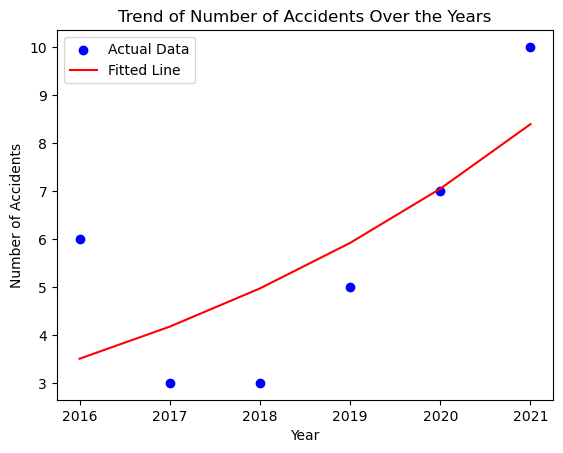

In [12]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Load the data from the sheet
df = pd.read_excel('Quetta.xlsx', sheet_name='annual distribution')

# Prepare the data for GLM
df['Year'] = df['Year']  # Year as predictor
df['No_of_Accidents'] = df['No of Accidents']  # Number of accidents as outcome

# Fit the GLM model
model = smf.glm('No_of_Accidents ~ Year', data=df, family=sm.families.Poisson()).fit()

# Print the summary of the GLM
print(model.summary())

# Plot the data and the regression line
plt.scatter(df['Year'], df['No_of_Accidents'], color='blue', label='Actual Data')
plt.plot(df['Year'], model.fittedvalues, color='red', label='Fitted Line')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Trend of Number of Accidents Over the Years')
plt.legend()
plt.show()


### Interpretation of GLM Results

#### Overview
The provided GLM results analyze the relationship between the year and the number of accidents using a Poisson regression model with a log link function. The data consists of 6 observations, and the model includes only the `Year` variable.

#### Key Findings

1. **Intercept**:
   - **Value**: -350.7980
   - **Standard Error**: 208.458
   - **z-Value**: -1.683
   - **P>|z|**: 0.092
   - **95% Confidence Interval**: [-759.368, 57.773]

   The intercept represents the expected log count of accidents when the year is zero. This value is negative, which is not directly interpretable but suggests a baseline level for the model. The p-value (0.092) indicates that the intercept is not statistically significant at the 5% level, meaning it is not significantly different from zero.

2. **Coefficient for Year**:
   - **Value**: 0.1746
   - **Standard Error**: 0.103
   - **z-Value**: 1.691
   - **P>|z|**: 0.091
   - **95% Confidence Interval**: [-0.028, 0.377]

   The coefficient for `Year` is 0.1746. In the context of a Poisson regression with a log link function, this coefficient suggests that the number of accidents increases by a factor of approximately \(e^{0.1746} \approx 1.191\) for each additional year. 

   - **Statistical Significance**: The p-value for the `Year` coefficient is 0.091, which is above the conventional threshold of 0.05. This indicates that while there is a positive trend suggesting an increase in the number of accidents over the years, this trend is not statistically significant at the 5% level. 

   - **Confidence Interval**: The 95% confidence interval for the coefficient includes zero ([-0.028, 0.377]), reinforcing the lack of strong statistical significance.

#### Conclusion

The analysis suggests a positive trend in the number of accidents over the years, with the number of accidents potentially incaw more definitive conclusions.